In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
from scipy import stats
import matplotlib.pyplot as pylab

In [2]:
data_train = pd.read_csv("data_Train.csv", index_col="Train_ID")
data_test = pd.read_csv("data_Test.csv", index_col="Test_ID")
data_train.head()

,SALARY,POSITION,TEAM,Age,Games,Minutes,PER,TS,ORB,DRB,...,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
Train_ID,,,,,,,,,,,,,,,,,,,,,
1,2.489530,PF,Houston Rockets,22,76,2078,19.1,0.577,9.2,18.5,...,7.0,1.3,3.5,8.2,18.3,119,105,4.6,2.7,7.3
2,2.433333,PG,Utah Jazz,24,73,1490,13.2,0.510,1.6,10.7,...,28.8,1.7,0.1,14.3,19.0,105,109,1.2,1.2,2.3
3,20.158622,SF,Oklahoma City Thunder,25,81,3122,29.8,0.635,2.2,18.6,...,26.7,1.7,1.5,12.2,33.0,123,104,14.8,4.4,19.2
4,12.404495,PG,Houston Rockets,26,62,2222,19.0,0.554,1.9,8.5,...,38.2,2.2,0.3,16.9,22.7,113,110,4.8,1.5,6.3
5,1.500000,PG,Brooklyn Nets,21,48,489,8.3,0.446,2.6,7.3,...,20.4,2.7,0.2,20.9,17.4,90,110,-0.4,0.3,-0.1


In [3]:
data_train.isnull().sum()

SALARY      0
POSITION    0
TEAM        0
Age         0
Games       0
Minutes     0
PER         0
TS          0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
USG         0
ORtg        0
DRtg        0
OWS         0
DWS         0
WS          0
dtype: int64

In [4]:
data_train.describe()

,SALARY,Age,Games,Minutes,PER,TS,ORB,DRB,TRB,AST,STL,BLK,TOV,USG,ORtg,DRtg,OWS,DWS,WS
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.00000
mean,6.784165,26.682540,69.460317,1809.015873,14.964286,0.542540,5.154762,15.116667,10.136508,14.457143,1.587302,1.522222,13.486508,19.989683,107.182540,106.865079,2.337302,1.839683,4.18254
std,5.647912,4.080492,11.433040,703.561511,4.306320,0.045747,3.825422,6.018475,4.626646,9.821083,0.617606,1.359464,4.156602,4.962094,7.589889,3.679898,2.639507,1.178683,3.40273
min,0.111444,19.000000,40.000000,393.000000,6.300000,0.446000,1.000000,6.200000,4.100000,2.100000,0.200000,0.000000,7.200000,9.300000,88.000000,97.000000,-0.900000,0.000000,-0.10000
25%,2.385205,23.000000,62.000000,1290.250000,12.425000,0.510000,2.125000,10.125000,6.025000,7.025000,1.125000,0.600000,10.400000,16.425000,102.000000,104.000000,0.600000,0.900000,1.72500
50%,4.500000,26.000000,72.500000,1859.000000,14.000000,0.540000,3.700000,13.800000,9.200000,11.250000,1.500000,1.100000,12.500000,19.100000,107.000000,107.000000,1.650000,1.600000,3.15000
75%,9.591416,29.000000,79.000000,2405.000000,16.750000,0.567750,7.300000,19.200000,13.900000,19.975000,2.000000,1.875000,15.500000,23.275000,112.000000,110.000000,3.300000,2.475000,5.57500
max,22.970500,37.000000,82.000000,3122.000000,29.800000,0.730000,17.500000,32.100000,22.300000,44.300000,3.800000,7.400000,28.800000,33.000000,130.000000,115.000000,14.800000,6.400000,19.20000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 1 to 126
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SALARY    126 non-null    float64
 1   POSITION  126 non-null    object 
 2   TEAM      126 non-null    object 
 3   Age       126 non-null    int64  
 4   Games     126 non-null    int64  
 5   Minutes   126 non-null    int64  
 6   PER       126 non-null    float64
 7   TS        126 non-null    float64
 8   ORB       126 non-null    float64
 9   DRB       126 non-null    float64
 10  TRB       126 non-null    float64
 11  AST       126 non-null    float64
 12  STL       126 non-null    float64
 13  BLK       126 non-null    float64
 14  TOV       126 non-null    float64
 15  USG       126 non-null    float64
 16  ORtg      126 non-null    int64  
 17  DRtg      126 non-null    int64  
 18  OWS       126 non-null    float64
 19  DWS       126 non-null    float64
 20  WS        126 non-null    float6

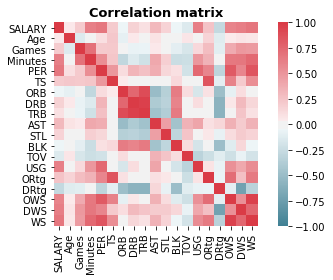

In [6]:
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_train.corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()

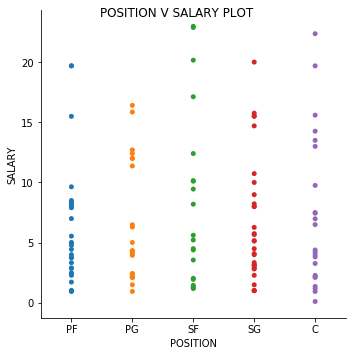

In [9]:
catplot=sns.catplot(x="Variable 1", y="Variable 2", jitter=False, data=data_train)
catplot=catplot.fig.suptitle('POSITION V SALARY PLOT')
plt.show()

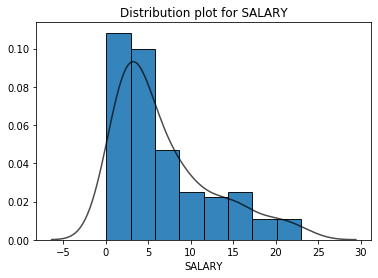

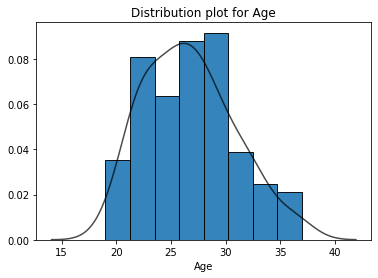

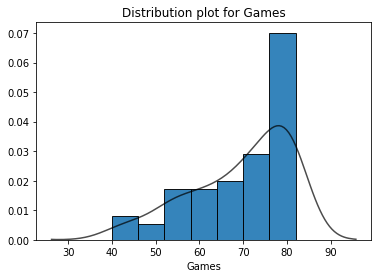

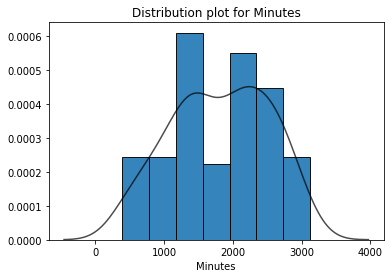

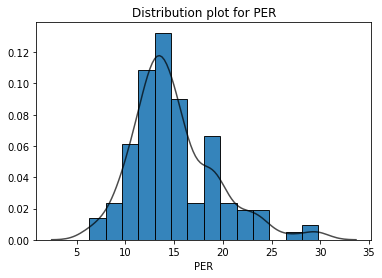

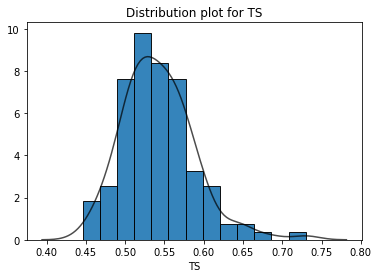

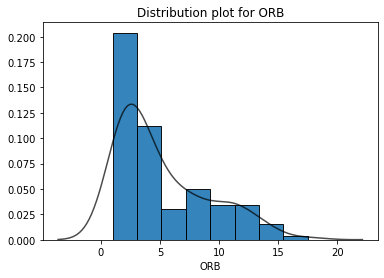

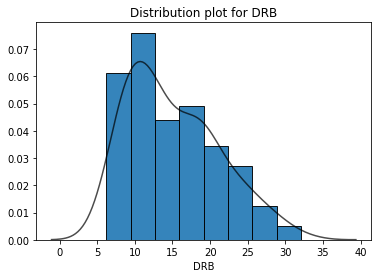

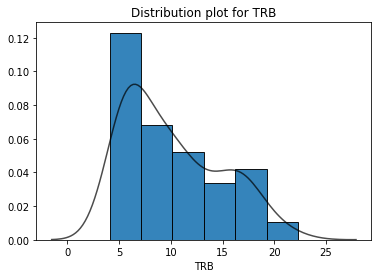

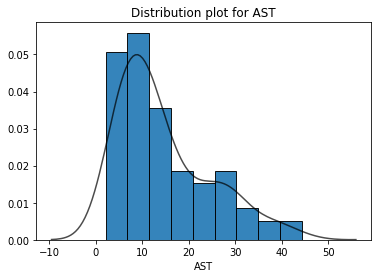

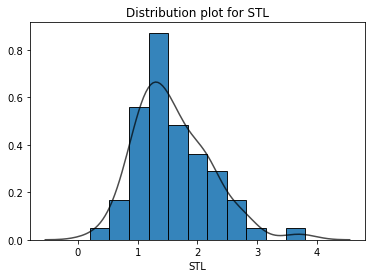

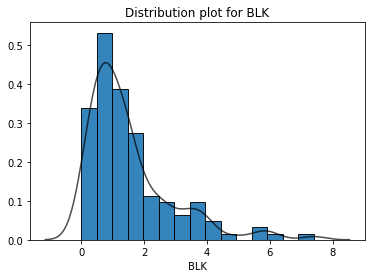

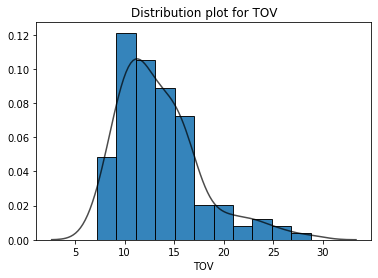

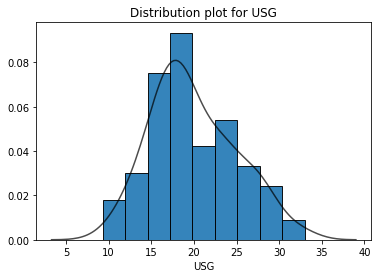

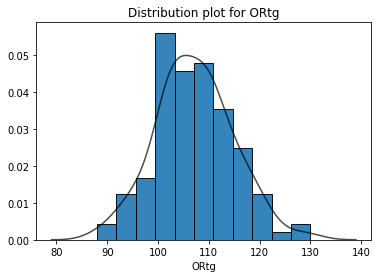

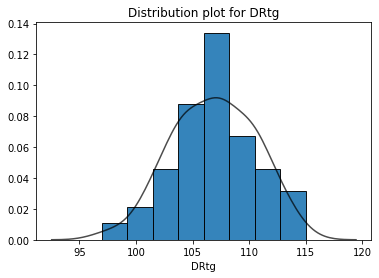

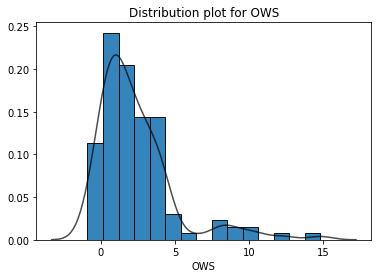

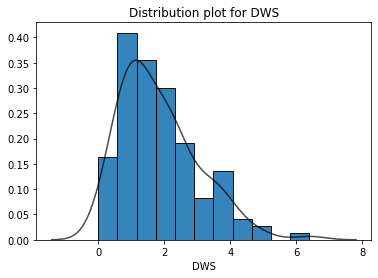

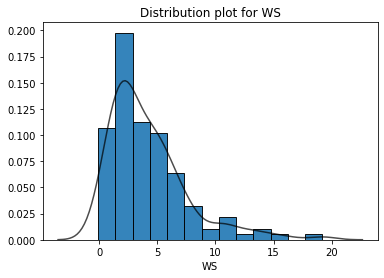

In [7]:
def hist(series, title = ''):
    fig, ax= plt.subplots()
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black'},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    ax.set_title('Distribution plot for {title}'.format(title = str(title)))
    return fig, ax
# Create a list of our variables:

#Note: drop any categorical variables
data_Q_Q=data_train.drop(['Cat Variable 1','Cat Variable 2'],axis=1)
for col in data_hist.columns:
    hist(data_hist[col],col)
    
    plt.show()

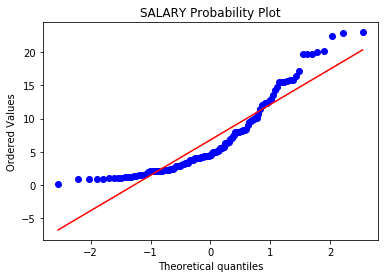

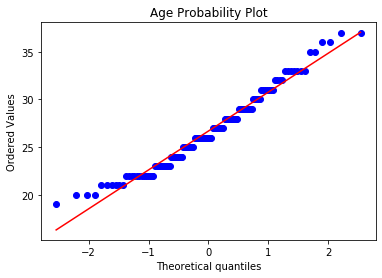

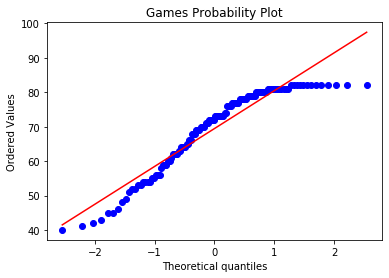

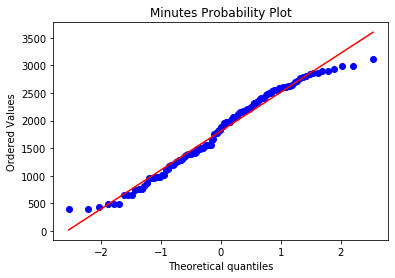

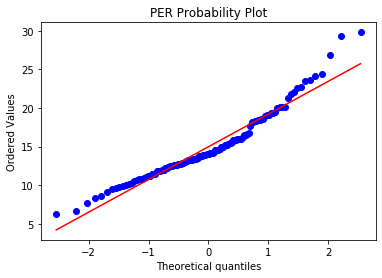

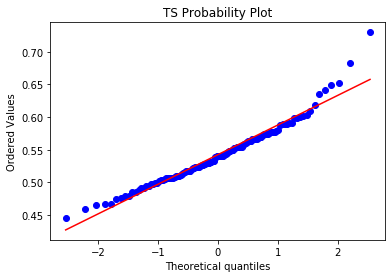

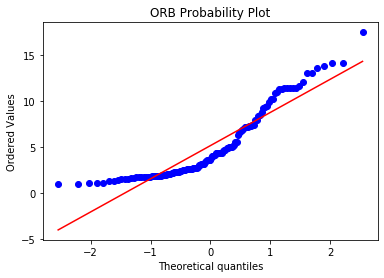

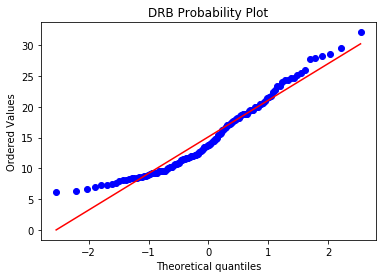

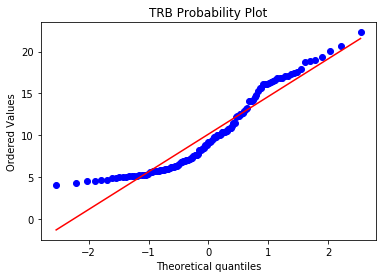

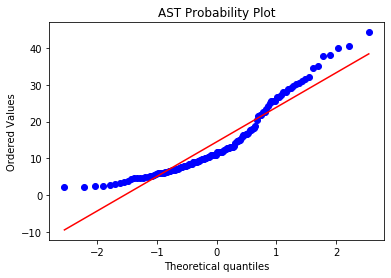

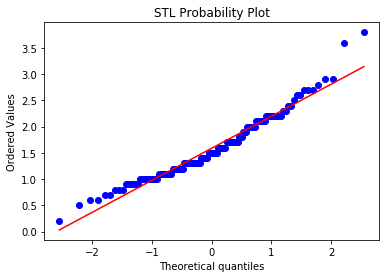

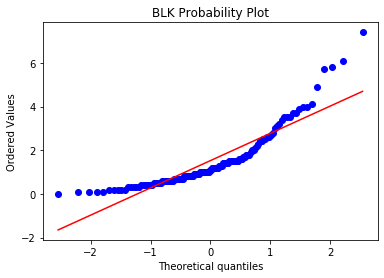

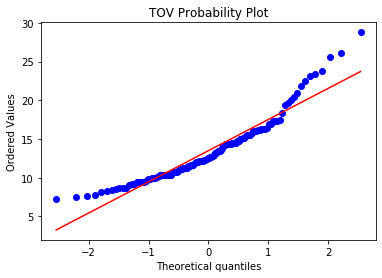

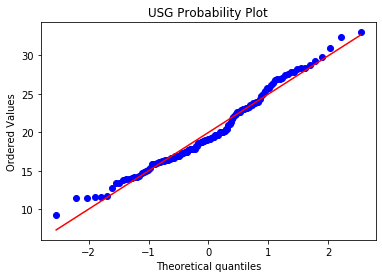

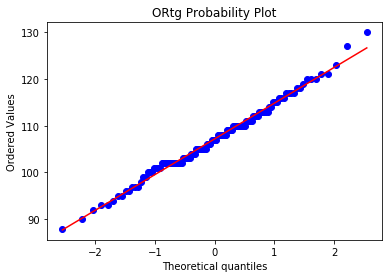

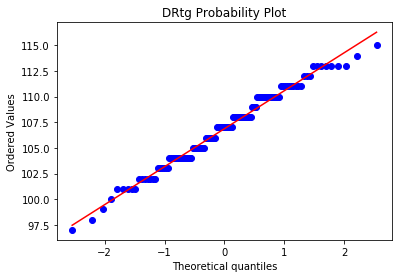

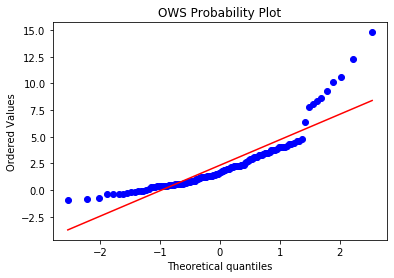

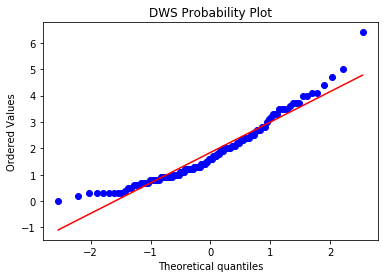

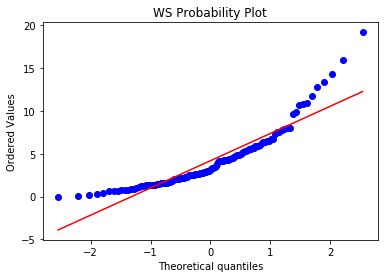

In [8]:
#Note: drop any categorical variables
data_Q_Q=data_train.drop(['Cat Variable 1','Cat Variable 2'],axis=1)
for val in data_Q_Q.columns:
    stats.probplot(data_Q_Q[val], dist="norm", plot=pylab)
    pylab.title(val + ' Probability Plot')
    pylab.show()